# DS-210: Programming for Data Science


# Lecture 12: Cross–validation. Hyperparameter tuning.


## Attendance poll: https://piazza.com/class/lrat4tm83gbnz

## Midterm

* **Date and time:** Friday 2/23, same as class time
* **Location:** here


* Bring up to 5 pages of notes
* No laptops or other devices allowed
* All materials from lecture 1-13 and homeworks 1-4 are applicable.

**Content:**
* data analysis in Python
* general data analysis concepts
* Python features explained in class

**Format:**
* answer quiz questions
* explain simple concepts
* write simple code


## How to debug python problems

``python3 -m pdb your_program.py arg1 arg2 ... argN``  
and then  
``   
list, up, down, step, next, break, print
``  
are your friends

Let's follow an example on the terminal

## Terminology

**Parameters**
* Variables fixed in a specific instantiation of a model
* Examples:
  * coefficients in linear regression
  * decision tree structure and thresholds
  * weights and thresholds in a neural network


**Hyperparameters**
* Also parameters, but higher level


* Examples:
  * number of leafs in a decision tree
  * number of layers and their structure in a neural network
  * degree of a polynomial


**Hyperparameter tuning**
* Adjusting hyperparameters before training the final model


**Model selection**
* Deciding on the type of model to be used (linear regression? decision trees? ...)



## Decision Tree discussion
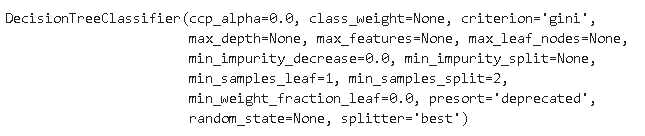

* Tree structure and thresholds for splits are parameters (learned by the algorithm)  
* Many of the others are hyperparameters
 * min_impurity_decrease: How much reduction in gini or other metric should we see before we allow a split 
 * min_impurity_split: How much impurity should a node have before we decide to split it  
 * max_depth: Affects the structure of the tree and how elements can be assigned to nodes
 * max_leaf_nodes: Affects the number of categories we want to have
 * max_features: Max number of categories to look at when splitting a node
 
 All documented at great length in (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


## Challenges of training and cross-validation

**Big goal:** train a model that can be used for predicting

**Intermediate goal:** select the right model and hyperparameters

<div align="center">
    <b>How about trying various options and seeing how they perform on the test set?</b>
</div>

<div align="center">

</div>

**Information leak danger!**

* If we do it adaptively, information from the test set could affect the model selection

<div align="center">
    <h2><b>Cross–validation</b> attempts to solve this problem </h2>
</div>

Tune your parameters by using portions of the training set and preserve the test set for only a final evaluation

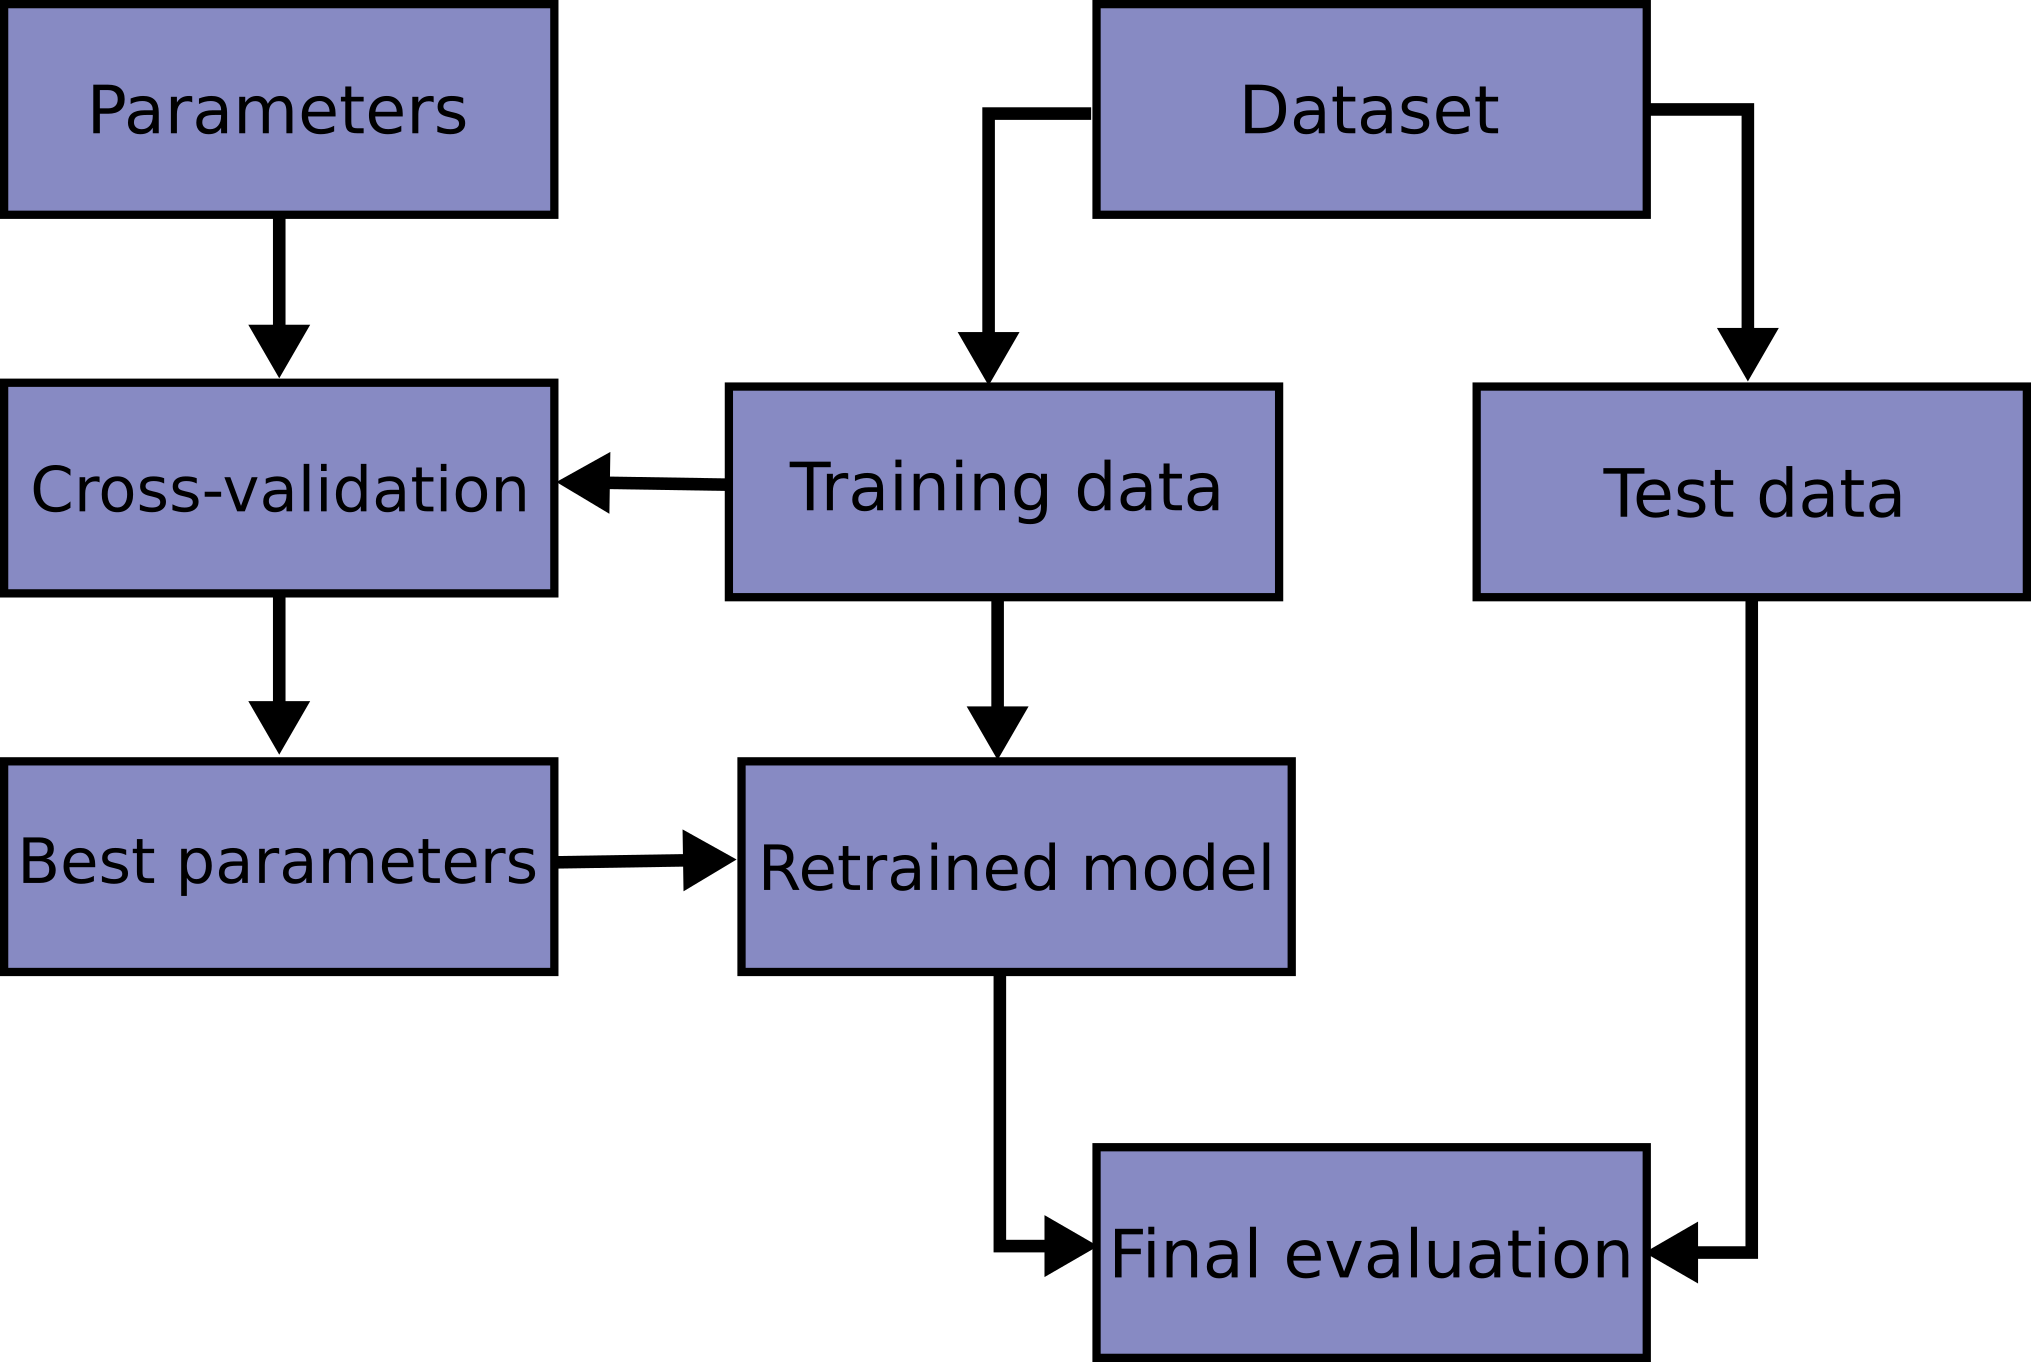

## Holdout method

* Partition the training data again: training set and validation set

* Use the validation part to estimate accuracy whenever needed

<div align="center">

</div>

**Pros:**
* Very efficient
* Fine with lots of data when losing a fraction is not a problem

**Cons:**
* Yet another part of data not used for training
* Problematic when the data set is small
* Testing part could contain important information

## $k$–fold cross–validation

* Partition the training set into $k$ folds at random
* Repeat $k$ times:
  - train on $k-1$ folds
  - estimate the accuracy on the $k$-th fold
* Return the mean


<div align="center">

</div>

**Pros:**
* Every data point used for training most of the time
* Less variance in the estimate

**Cons:**
* $k$ times slower

## LOOCV: Leave–one–out cross–validation

* Extreme case of the previous approach: separate fold for each data point


* For each data point $q$:
  - train on data without $q$
  - estimate the accuracy on $q$
* Return the mean of accuracies


**Cons:**
* Even more expensive

## Many other options

* Generalization: leave–$p$–out cross–validation enumerates over $\binom{n}{p}$ subsets

* Sampling instead of trying all options

* A variation that ensures that all classes evenly distributed in folds

* ... 

(scikit-learn docs are pretty good: https://scikit-learn.org/stable/modules/cross_validation.html)

and  

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

### Hyperparameter searching 

Many helpful tools:

https://scikit-learn.org/stable/modules/grid_search.html

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=120)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(90, 4) (90,)
(60, 4) (60,)


In [8]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9444444444444444
0.9666666666666667


In [6]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10,verbose=0)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]
0.95 accuracy with a standard deviation of 0.05


## Getting ready for the second part of the course

* Text editor

* Rust installation


* Terminal usage

* Version control: git (will be covered next time)